# RUN THIS CELL ONLY ONCE

In [2]:
import os
# Get the current path of the notebook

notebook_path = os.getcwd()
# Construct the path to the directory containing 'fit'
parent_path = os.path.join(notebook_path, '..')


Global seed set to 69


/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.activation_relu_or_gelu was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


./ckpts/t_tnf.ckpt


/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cf ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

(0.0004762810174226761, 4.443710701910444e-05)
(0.000530515176810324, 8.638514816279308e-05)
(0.0004893362627476455, 5.8138485662680534e-05)
(0.0005516838961243633, 8.211184893237183e-05)
(0.0004989768968522549, 9.267786007304376e-05)


/tmp/ipykernel_72869/3004092235.py:161: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mins=torch.cat([mins, torch.tensor(m_t.min()).unsqueeze(0)])-0.01
/tmp/ipykernel_72869/3004092235.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  maxs=torch.cat([maxs,torch.tensor(m_t.max()).unsqueeze(0)])+0.01
/home/kaechben/MDMACalo/notebooks/../utils/helpers.py:325: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3)


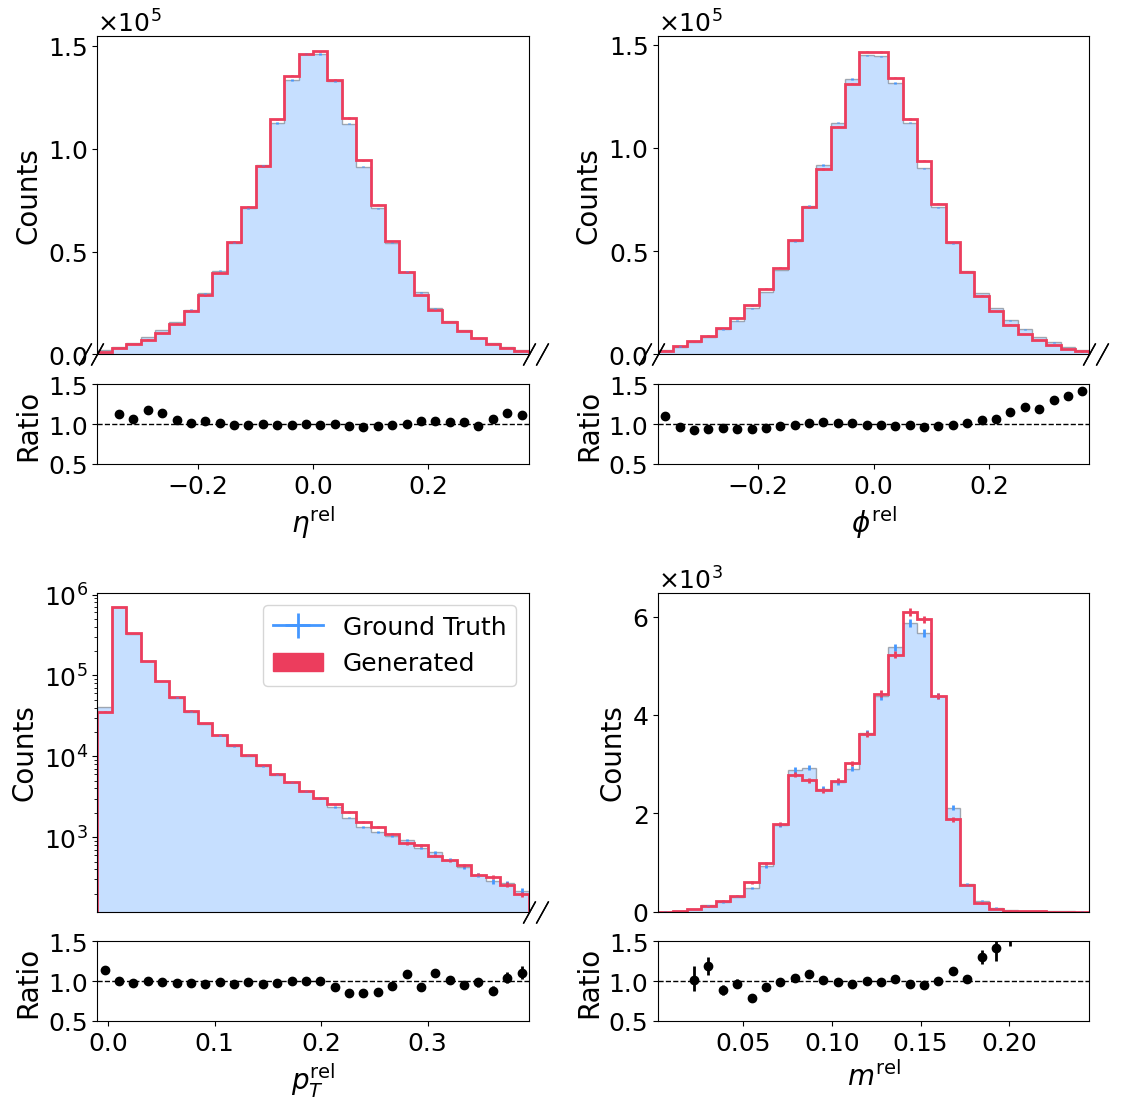

./ckpts/t_tf.ckpt


/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.activation_relu_or_gelu was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cfm/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/mdma-cf ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

(0.0007878285495489835, 6.608408067977716e-05)
(0.0007028277995549145, 7.591502728049018e-05)
(0.0007467273003347219, 3.814916442043967e-05)
(0.0006953613283149898, 9.526910398137162e-05)
(0.0007693939728848635, 8.961720469104362e-05)


/tmp/ipykernel_72869/3004092235.py:161: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mins=torch.cat([mins, torch.tensor(m_t.min()).unsqueeze(0)])-0.01
/tmp/ipykernel_72869/3004092235.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  maxs=torch.cat([maxs,torch.tensor(m_t.max()).unsqueeze(0)])+0.01
/home/kaechben/MDMACalo/notebooks/../utils/helpers.py:325: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3)


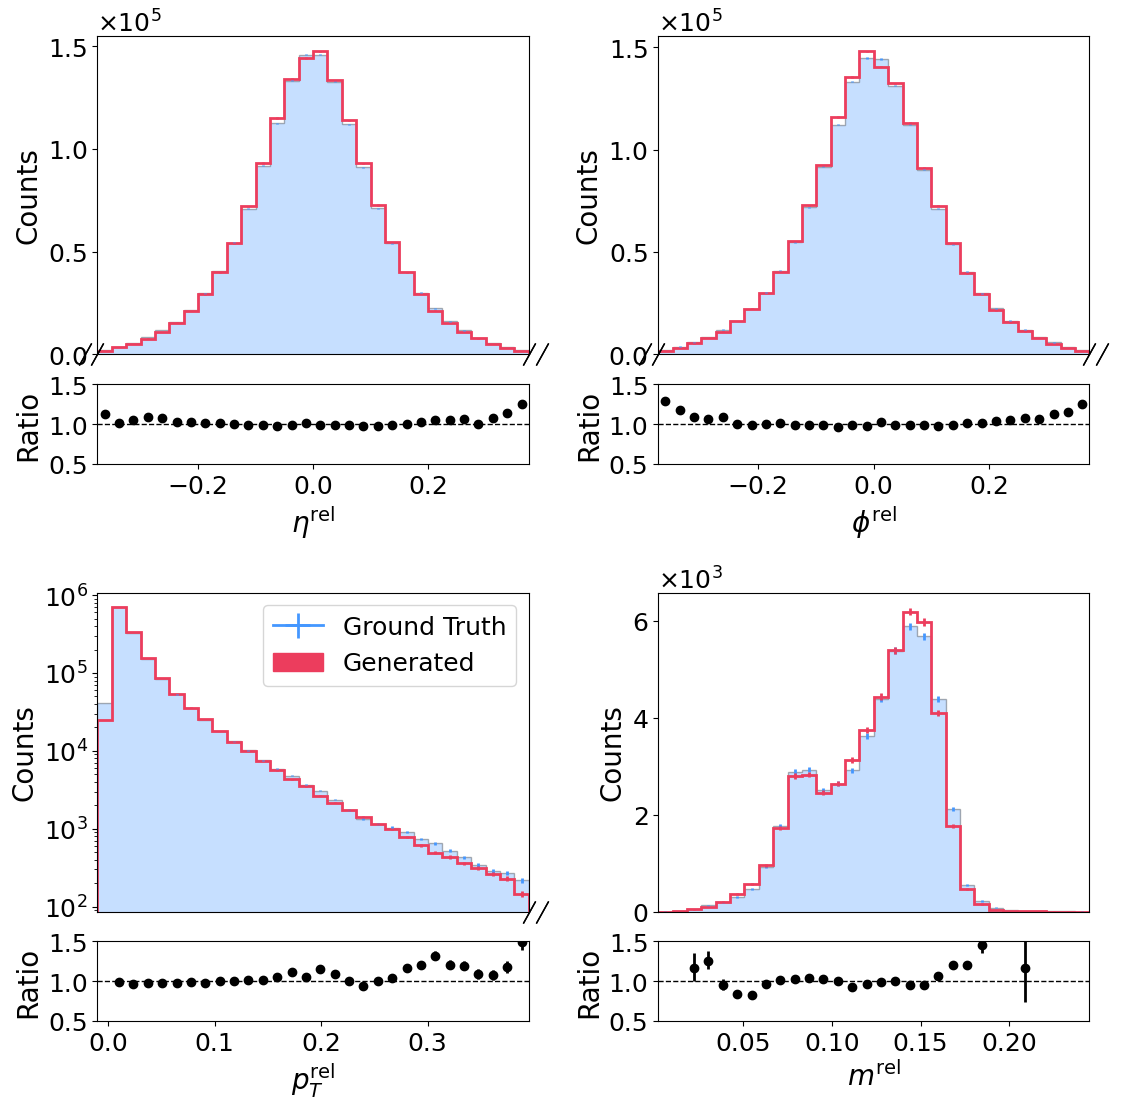

In [7]:
%matplotlib inline
import torch

os.chdir(parent_path)
import sys
# Add this parent directory to the system path
sys.path.insert(0, parent_path)
from fit.fit_pnf import PNF as PNFModel
from fit.fit_nf import NF as NFModel
from fit.fit_tnf import TNF as TNFModel
from fit.fit_tf import TF as TFModel
import pytorch_lightning as pl
import torch
from utils.dataloader_jetnet import PointCloudDataloader
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from utils.helpers import get_hists, mass
from utils.dataloader_jetnet import PointCloudDataloader
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, FuncFormatter
from jetnet.evaluation import w1m
from utils.helpers import mass, plotting_thesis,fit_kde,sample_kde,create_mask
pl.seed_everything(69)


def calculate_data_bounds(dataloader):
    """
    Calculates the minimum and maximum values across the dimensions from the dataloader.

    :param dataloader: The dataloader to process.
    :param n_dim: Number of dimensions.
    :return: Tuple of minimum values, maximum values, and count of non-masked data points.
    """
    mins = torch.ones(3).unsqueeze(0)
    maxs = torch.ones(3).unsqueeze(0)
    n = []
    for i in dataloader:
        mins = torch.min(
            torch.cat((mins, i[0][~i[1]].min(0, keepdim=True)[0]), dim=0), dim=0
        )[0].unsqueeze(0)
        maxs = torch.max(
            torch.cat((maxs, i[0][~i[1]].max(0, keepdim=True)[0]), dim=0), dim=0
        )[0].unsqueeze(0)
        n.append((~i[1]).sum(1))
    # model.maxs = maxs.cuda()
    # model.mins = mins.cuda()
    # model.avg_n = torch.cat(n, dim=0).float().cuda().mean()
    return mins, maxs, n

def setup_model_with_data(model, data_module):
    """
    Sets up the model with the data module and configuration parameters.

    :param model: The model to be set up.
    :param data_module: The data module used for training and validation.
    :param config: Configuration dictionary.
    """
    model.bins = [100, 100, 100, 100]
    model.n_dim = 3
    model.scaler = data_module.scaler[0]
    model.pt_scaler = data_module.scaler[1]
    model.w1m_best = 0.01


    # Calculate the minimum and maximum values from the training data
    mins, maxs, n_counts = calculate_data_bounds(data_module.train_dataloader())
    model.maxs = maxs.cuda()
    model.mins = mins.cuda()
    model.avg_n = torch.cat(n_counts, dim=0).float().cuda().mean()
    model.gen_net.avg_n = torch.cat(n_counts, dim=0).float().cuda().mean()
    model.dis_net.avg_n = torch.cat(n_counts, dim=0).float().cuda().mean()
    # Additional model settings
    model.scaler = model.scaler.to("cuda")
    model.scaler.std = model.scaler.std.cuda()
    model.scaled_mins = torch.tensor(data_module.mins).cuda()
    model.scaled_maxs = torch.tensor(data_module.maxs).cuda()



def make_plots(model_name, disco=False):

    ckptdir = "./ckpts/"
    ckpt = "t_{}.ckpt".format(model_name)
    # ckpt = "t_{}.ckpt".format(model_name)
    ckpt = ckptdir + ckpt
    print(ckpt)

    # Load state dictionary from checkpoint
    # state_dict = torch.load(ckpt)
    # config = state_dict["hyper_parameters"]
    # config["model_name"] = model_name

    # print(config)
    # Choose the model class based on the model name
    if model_name in ["ipf", "pf", "apf"]:
        # config["pf"] = True
        # config["adversarial"] = False
        # config["norm"]=False
        # config["fast"]=False

        model_class = PNFModel
    else:
        # config["pf"] = False
        model_class = NFModel if model_name.find("t")==-1 else TNFModel if model_name.find("tnf")>-1 else TFModel

    torch.set_float32_matmul_precision('medium' )
    model = model_class.load_from_checkpoint(ckpt)

    # Initialize data module and set up model
    data_module = PointCloudDataloader(parton="t",n_dim=3,n_part=30,batch_size=1024,sampler=False)
    data_module.setup("fit")


    # Assuming `model` is defined elsewhere in your code
    setup_model_with_data(model, data_module)
    train=data_module.train_dataloader().dataset.cuda()
    test=data_module.test_dataloader().dataset.cuda()
    pt=model.pt_scaler.inverse_transform(train[:,:,-2])
    std=model.scaler.inverse_transform(train[:,:,:-2])
    train=torch.cat((std,pt.unsqueeze(2),train[:,:,-1:]),dim=2)
    data=torch.cat((train,test[:,:,:]),dim=0)
    m=mass(data.cuda()).cpu()
    n=(~(torch.cat((train,test),dim=0)[:,:,-1]).bool()).float().sum(1).cpu()
    n_kde,m_kde=fit_kde(n,m)
    n,m=sample_kde(len(data),n_kde,m_kde)
    # Trainer setup and model validation
    trainer = pl.Trainer(devices=1, accelerator="gpu")
    model.eval_metrics=False
    model.batch=[]
    model.masks=[]
    model.fake=[]
    model.conds=[]
    model=model.cuda()
    model.load_datamodule(data_module)
    with torch.no_grad():
        trainer.test(model, data_module.test_dataloader())

    # concatenate all batches
    fake = torch.cat(model.fake)
    true = torch.cat(model.batch)
    # sorted_indices = torch.argsort(fake[:,:,2], dim=1, descending=True)
    # fake = torch.gather(fake, 1, sorted_indices.unsqueeze(-1).expand(-1, -1, fake.shape[2]))

    m_f, m_t = mass(fake), mass(true)

    # Apply clamping based on quantiles
    mins = torch.quantile(true.reshape(-1, 3), 0.001, dim=0)
    maxs = torch.quantile(true.reshape(-1, 3), 0.999, dim=0)
    # fake = torch.clamp(fake, min=mins, max=maxs)
    # true = torch.clamp(true, min=mins, max=maxs)

    for i in range(5):
        w1m_=w1m(fake,true)
        print(w1m_)
    # m_f = torch.clamp(m_f, min=torch.quantile(m_t, 0.001), max=torch.quantile(m_t, 0.999))
    # m_t = torch.clamp(m_t, min=torch.quantile(m_t, 0.001), max=torch.quantile(m_t, 0.999))
    mins=torch.cat([mins, torch.tensor(m_t.min()).unsqueeze(0)])-0.01
    maxs=torch.cat([maxs,torch.tensor(m_t.max()).unsqueeze(0)])+0.01
    # Prepare histograms
    hists=get_hists([30,30,30,30],mins,maxs,calo=model.name=="calo")
    # Fill histograms
    for var in range(3):
        hists["hists_real"][var].fill(true.reshape(-1, 3)[(true.reshape(-1, 3) != 0).all(1)][:, var].cpu().numpy())
        hists["hists_fake"][var].fill(fake.reshape(-1, 3)[(fake.reshape(-1, 3) != 0).all(1)][:, var].cpu().numpy())


    hists["hists_real"][3].fill(m_t.cpu().numpy())
    hists["hists_fake"][3].fill(m_f.cpu().numpy())

    # Plotting
    plotter = plotting_thesis()
    plotter.plot_ratio(hists["hists_real"], hists["hists_fake"], weighted=False, leg=2, model_name=model_name)
    # plotter.plot_corr(true.numpy(), fake.numpy(), model_name, disco=disco,leg=-1)
    return model
pointflows=[ "ipf", "apf", "pf",]
flows=["nf","cnf","ccnf"]
gans=["tnf","tf"]

for model_name in  gans:#
    model=make_plots(model_name)